In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
import time, datetime

In [45]:
df= pd.read_csv("C:/Users/harsh/Downloads/My Uber Drives - 2016.csv")
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [46]:
df["START_DATE*"].dtype

dtype('O')

In [47]:
# old_columns =list(df.columns)
# new_columns=[i[:-1] for i in old_columns]
# df_old_to_new = {old_columns[i]:new_columns[i] for i in range(len(old_columns))}
# df.rename(columns = df_old_to_new)

In [48]:
old_columns = list(df.columns)
new_columns = [i[:-1] for i in old_columns]
df.columns =new_columns
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [49]:
df["PURPOSE"].value_counts()
df["PURPOSE"].fillna("OTHER")

0        Meal/Entertain
1                 OTHER
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
1155              OTHER
Name: PURPOSE, Length: 1156, dtype: object

In [50]:
df.isnull().sum()


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [51]:
df["PURPOSE"]=df["PURPOSE"].fillna("OTHER")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'OTHER'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

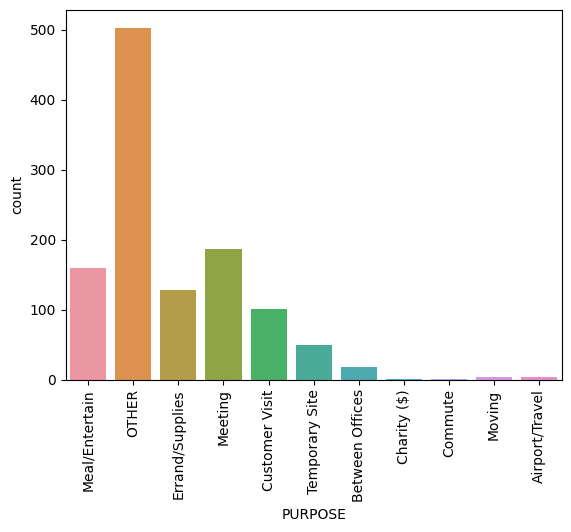

In [52]:
sb.countplot(x=df["PURPOSE"])
plt.xticks(rotation=90)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'START_DATE'),
  Text(1, 0, 'END_DATE'),
  Text(2, 0, 'CATEGORY'),
  Text(3, 0, 'START'),
  Text(4, 0, 'STOP'),
  Text(5, 0, 'MILES'),
  Text(6, 0, 'PURPOSE')])

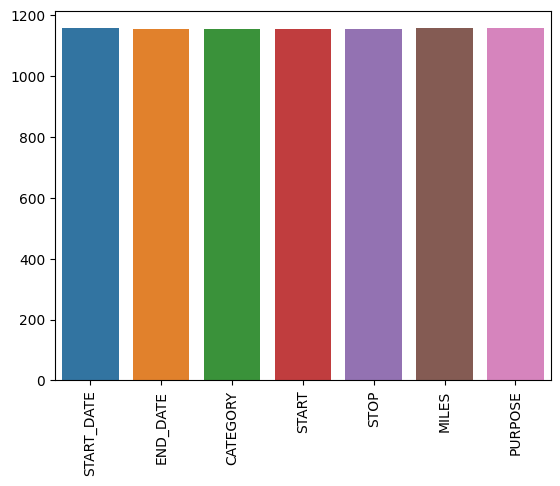

In [54]:
sb.barplot(x=df.columns, y= df.count().values)
plt.xticks(rotation=90)

In [55]:
# df["START_DATE"]=pd.to_datetime(df["START_DATE"])
# df["END_DATE"]=pd.to_datetime(df["END_DATE"])
# df.info()

<AxesSubplot: xlabel='CATEGORY', ylabel='count'>

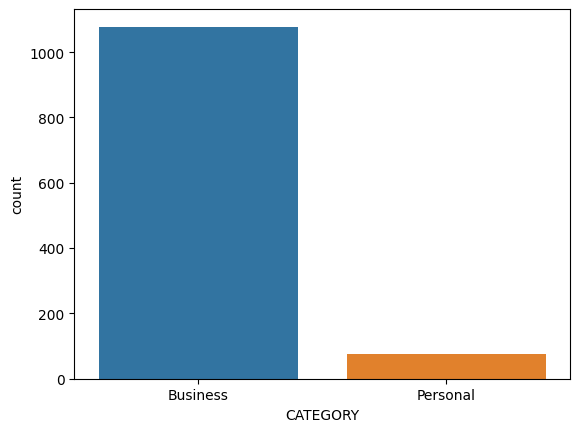

In [56]:

sb.countplot(x=df["CATEGORY"])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

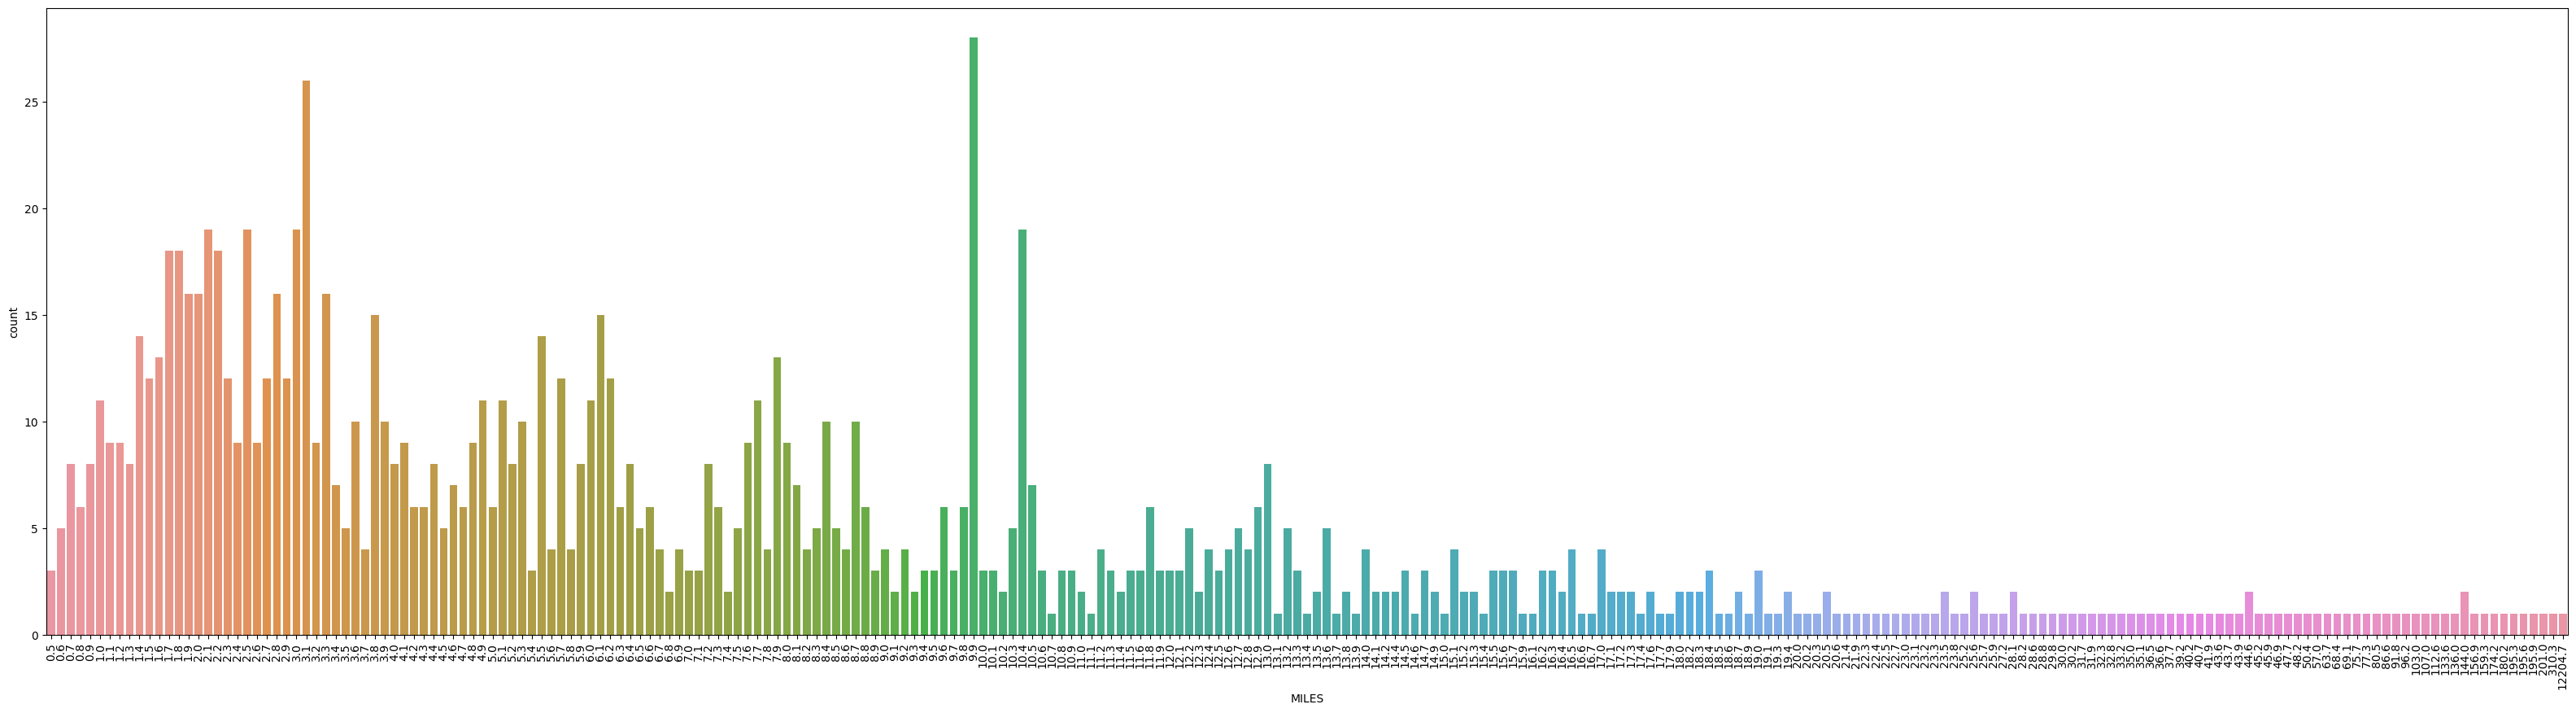

In [57]:
plt.figure(figsize=[40,10])
sb.countplot(x=df["MILES"])
plt.xticks(rotation=90)

In [58]:
df["START"].value_counts()


Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176]),
 

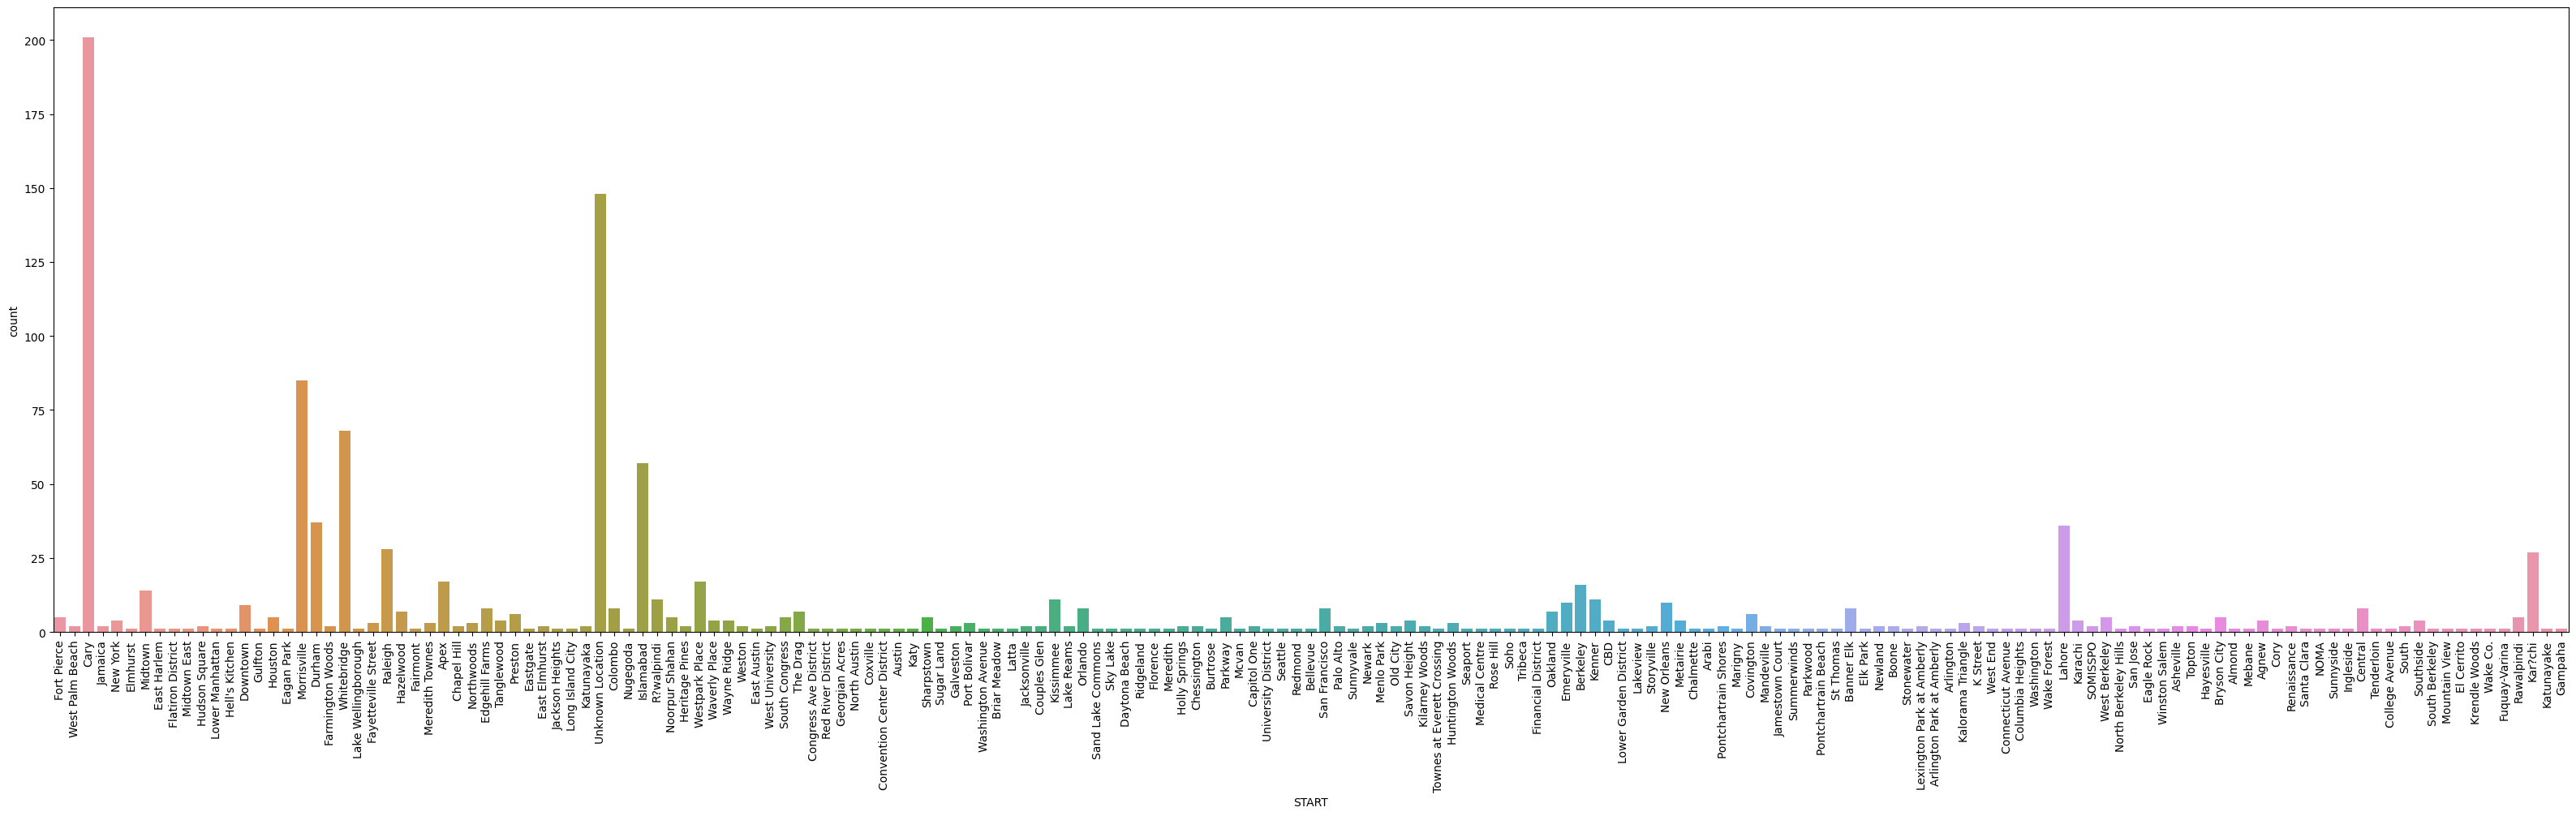

In [59]:
plt.figure(figsize=[40,10])
sb.countplot(x=df["START"])
plt.xticks(rotation =90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place')])

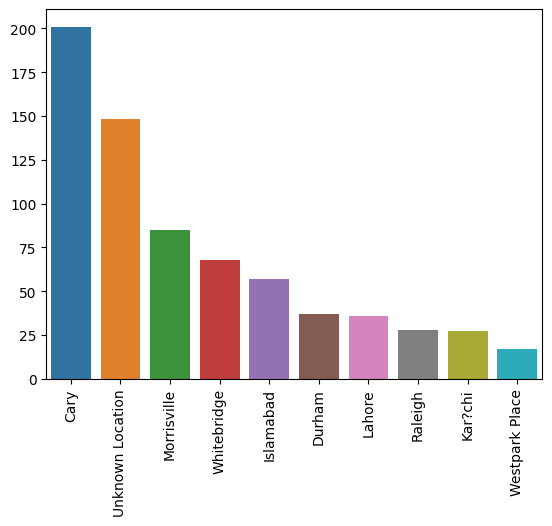

In [60]:
var= df["START"].value_counts().head(10)
sb.barplot(x=var.index , y=var.values)
plt.xticks(rotation=90)

[]

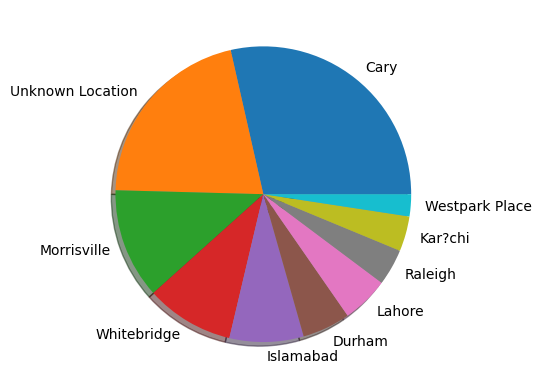

In [61]:
plt.pie(var,shadow= True, labels= var.index)
plt.plot()

In [62]:
var = df["START"].value_counts()
var

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [63]:
var[var>2]

Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
Durham                  37
Lahore                  36
Raleigh                 28
Kar?chi                 27
Westpark Place          17
Apex                    17
Berkeley                16
Midtown                 14
Kenner                  11
Kissimmee               11
R?walpindi              11
New Orleans             10
Emeryville              10
Downtown                 9
Edgehill Farms           8
Central                  8
Colombo                  8
Orlando                  8
San Francisco            8
Banner Elk               8
Hazelwood                7
The Drag                 7
Oakland                  7
Preston                  6
Covington                6
Bryson City              5
South Congress           5
West Berkeley            5
Parkway                  5
Noorpur Shahan           5
Fort Pierce              5
Sharpstown               5
H

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Waverly Place'),
  Text(1, 0, 'CBD'),
  Text(2, 0, 'Southside'),
  Text(3, 0, 'Meredith Townes'),
  Text(4, 0, 'Fayetteville Street'),
  Text(5, 0, 'Huntington Woods'),
  Text(6, 0, 'Kalorama Triangle'),
  Text(7, 0, 'Northwoods'),
  Text(8, 0, 'Port Bolivar'),
  Text(9, 0, 'Menlo Park')])

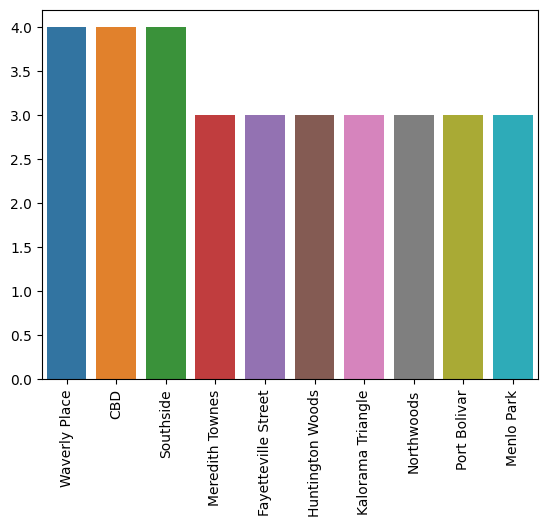

In [64]:
var= var[var>2].tail(10)

sb.barplot(x=var.index, y=var.values)
plt.xticks(rotation=90)

In [65]:
df["MILES"].mean()

21.115397923875435

<AxesSubplot: ylabel='Count'>

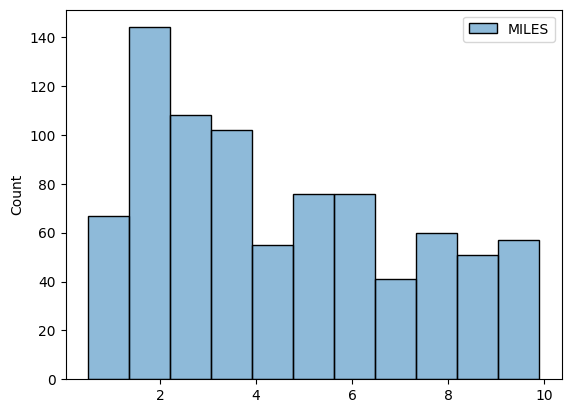

In [66]:
sb.histplot(df[df["MILES"]<10])

<AxesSubplot: >

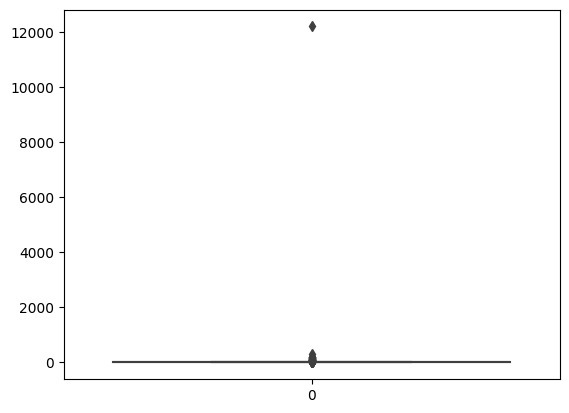

In [67]:
sb.boxplot(df["MILES"])

C:\Users\harsh\AppData\Local\Temp\ipykernel_17904\1065094922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["MILES"])


<AxesSubplot: xlabel='MILES', ylabel='Density'>

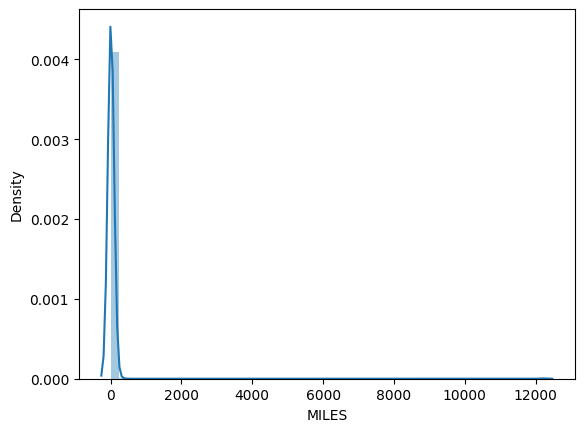

In [68]:
sb.distplot(df["MILES"])

<AxesSubplot: >

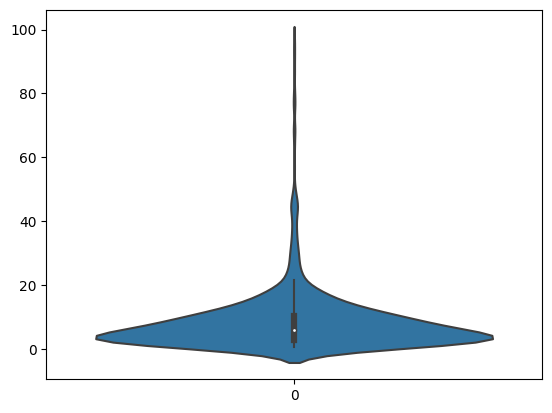

In [69]:
sb.violinplot(df[df["MILES"]<100]["MILES"])

In [70]:
df.drop(list(df[df["PURPOSE"]=="OTHER"].index))

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meeting'),
  Text(1, 0, 'Meal/Entertain'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Moving'),
  Text(7, 0, 'Airport/Travel'),
  Text(8, 0, 'Charity ($)'),
  Text(9, 0, 'Commute')])

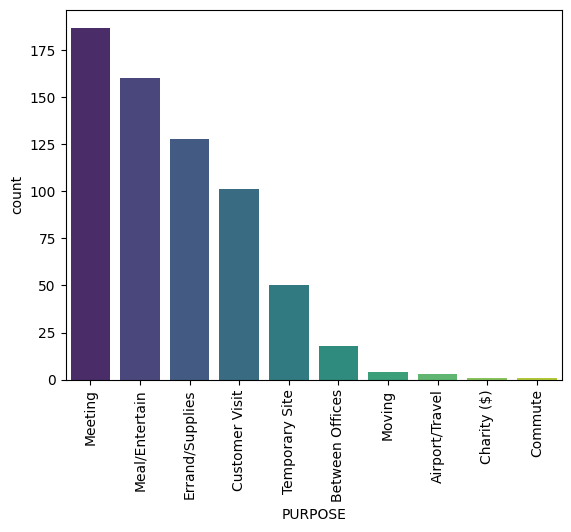

In [71]:
las=df[df["PURPOSE"]!="OTHER"]
sb.countplot(x=las["PURPOSE"], order=las["PURPOSE"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)

In [78]:
df["MINUTES"]=df["END_DATE"]-df["START_DATE"]
df

TypeError: cannot convert the series to <class 'int'>

In [76]:
df["MINUTES"]=df["MINUTES"].dt.total_seconds()  /60
df

KeyError: 'MINUTES'

In [79]:
# calculate average miles for each category in purpose column

df.groupby(["PURPOSE"]).describe()

MILES                                                  \
                 count        mean         std    min      25%     50%   
PURPOSE                                                                  
Airport/Travel     3.0    5.500000    1.852026    4.1    4.450    4.80   
Between Offices   18.0   10.944444    8.458913    1.9    5.200   11.60   
Charity ($)        1.0   15.100000         NaN   15.1   15.100   15.10   
Commute            1.0  180.200000         NaN  180.2  180.200  180.20   
Customer Visit   101.0   20.688119   40.632891    0.8    5.200    7.90   
Errand/Supplies  128.0    3.968750    3.464619    0.5    1.800    3.10   
Meal/Entertain   160.0    5.698125    5.019690    0.6    2.775    4.25   
Meeting          187.0   15.247594   25.093394    0.7    7.900   10.00   
Moving             4.0    4.550000    1.181807    3.3    3.900    4.40   
OTHER            503.0   33.992445  544.098119    0.6    2.300    5.00   
Temporary Site    50.0   10.474000    7.757440    1.8    6.100    8.00   

                                   
                     75%      max  
PURPOSE                            
Airport/Travel     6.200      7.6  
Between Offices   12.350     39.2  
Charity ($)       15.100     15.1  
Commute          180.200    180.2  
Customer Visit    16.300    310.3  
Errand/Supplies    4.800     22.3  
Meal/Entertain     7.100     36.5  
Meeting           13.200    201.0  
Moving             5.050      6.1  
OTHER             10.500  12204.7  
Temporary Site    12.675     48.2

In [82]:
df["MONTH"]=pd.DatetimeIndex(df["START_DATE"]).month

ParserError: Unknown string format: Totals present at position 1155

In [80]:
df["MONTH"]=df["START_DATE"].dt.month
df

AttributeError: Can only use .dt accessor with datetimelike values

<AxesSubplot: xlabel='START_DATE', ylabel='count'>

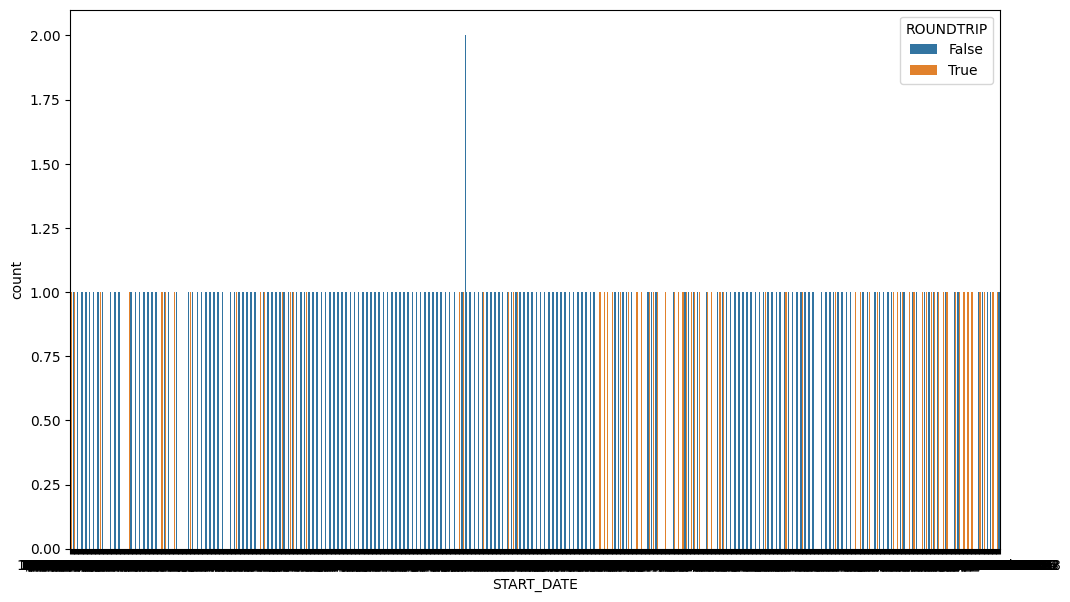

In [83]:
plt.figure(figsize=(12,7))
df["ROUNDTRIP"]=df["START"]==df["STOP"]
sb.countplot(data=df,x="START_DATE",hue ="ROUNDTRIP")